# Section 1: Dataset

For this Project, I decided to choose a dataset describing Real Estate Sales in the state of Connecticut between 2001 and 2020. It shows the list date, the date it was sold, the assessed value of the home, and the sale amount or the acutal price that the property was sold for. I chose this dataset specifically because I plan to live in Connecticut someday, so I thought that it would be interesting to do some "investigation" about the real estate market in this state; it might just give me the right idea of what prices I should expect if I decide to live there. Furthermore, since monopoly was one of my favorite games growing up, this real estate dataset perked my interest even more (buying and selling houses is just monopoly in real life). I found this dataset on U.S. Government's Open Data in the most viewed datasets.

In [10]:
import pandas as pd
df = pd.read_csv("Real_Estate_Sales_2001-2020_GL.csv")
df

C:\Users\venka\AppData\Local\Temp\ipykernel_10660\2491255183.py:2: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Real_Estate_Sales_2001-2020_GL.csv")


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020177,2020,4/14/2021,Ansonia,323 BEAVER ST,133000,248400.0,0.535400,Residential,Single Family
1,2020225,2020,5/26/2021,Ansonia,152 JACKSON ST,110500,239900.0,0.460600,Residential,Three Family
2,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463000,Commercial,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400,202500.0,0.629100,Residential,Two Family
4,200500,2020,9/7/2021,Avon,245 NEW ROAD,217640,400000.0,0.544100,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,6/24/2020,New London,4 BISHOP CT,60410,53100.0,1.137665,Single Family,Single Family
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280,76000.0,0.898400,Single Family,Single Family
997210,190129,2019,4/27/2020,Windsor Locks,19 HATHAWAY ST,121450,210000.0,0.578300,Single Family,Single Family
997211,190504,2019,6/3/2020,Middletown,8 BYSTREK DR,203360,280000.0,0.726300,Single Family,Single Family


# Section 2: Exploratory Data Analysis

Descriptive statistics that can help give a broad overview of this real estate data in Connecticut include:
- the mean and median price of the assessed prices for the houses since 2001
- the range of these assessed prices of the homes since 2001
- the mean and median price of the sales amount for the houses since 2001
- the range of the sales amount (or revenue generated on a property) since 2001
- the standard deviation of the sales amount from these homes
- the difference between the sales amount and assessed value of a property and its mean, median, range, and standard deviation
- the percentage of houses that have a sale amount of greater than $500,000 compared to those lower than that
- what year did the Connecticut Real Estate Market have the greatest revenue (total sales amount)?


In [11]:
mean_assessed_price = df["Assessed Value"].mean()
mean_assessed_price

279143.66538643197

In [12]:
median_assessed_price = df["Assessed Value"].median()
median_assessed_price

138390.0

In [13]:
range_assessed_prices = df["Assessed Value"].max() - df["Assessed Value"].min()
range_assessed_prices

881510000

In [14]:
df["Sales-Assessed"] = df["Sale Amount"] - df["Assessed Value"]

In [15]:
average_difference_sales_assessed = df["Sales-Assessed"].mean()
average_difference_sales_assessed

112007.51815476734

In [16]:
median_difference_sales_assessed = df["Sales-Assessed"].median()
median_difference_sales_assessed

84550.0

In [17]:
range_difference_sales_assessed = df["Sales-Assessed"].max() - df["Sales-Assessed"].min()
range_difference_sales_assessed

5874591470.0

In [18]:
std_difference_sales_assessed = df["Sales-Assessed"].std()
std_difference_sales_assessed

5422338.276854972

In [29]:
sales_amount_mean = df["Sale Amount"].mean()
sales_amount_mean

391151.18354119925

In [30]:
sales_amount_median = df["Sale Amount"].median()
sales_amount_median

225000.0

In [31]:
sales_amount_standard_deviation = df["Sale Amount"].std()
sales_amount_standard_deviation

5347270.212037066

In [19]:
sales_amount_range = df["Sale Amount"].max() - df["Sale Amount"].min()
sales_amount_range

5000000000.0

In [20]:
percent_more_than_five_hundred_thousand = len(df[df["Sale Amount"] > 500000]) / len(df["Sale Amount"])
percent_more_than_five_hundred_thousand

0.14405046865614468

In [21]:
percent_less_than_five_hundred_thousand = len(df[df["Sale Amount"] <= 500000]) / len(df["Sale Amount"])
percent_less_than_five_hundred_thousand

0.8559495313438553

In [22]:
df_by_year = df.groupby("List Year").agg("sum").reset_index()
df_by_year

,List Year,Serial Number,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales-Assessed
0,2001,630206471,1/10/20028/16/20022/27/20026/18/20021/2/20028/...,DanburyGuilfordBethelHamptonBranfordWest Hartf...,166 OLD BROOKFIELD RD6 LAUREL RDG211 LEXINGTON...,8279854934,1.467167e+10,2.089245e+05,0,0,6.391813e+09
1,2002,1229809738,3/18/200310/10/200211/22/200211/29/200212/4/20...,DarienGrotonCheshireHamdenBrooklynColchesterCo...,30 MAPLE ST11 CHERRY CIR61 BUTTONWOOD CIR35 N ...,10589620798,1.768719e+10,2.439402e+05,0,0,7.097565e+09
2,2003,1981805231,7/8/20043/25/200412/8/20034/1/200412/30/20036/...,BethelGuilfordFairfieldFairfieldGlastonburyDan...,34 ROCKWELL RD73 SUMMER ST240 SUNNYRIDGE AVE 7...,12081277046,2.102015e+10,3.430796e+05,0,0,8.938876e+09
3,2004,3430216460,5/31/20052/17/20051/19/200510/13/20043/3/20056...,OxfordBethanyBridgeportAvonAvonAnsoniaCanaanBr...,NEWGATE RD55 ACORN DR1618 NORTH AVE8 THISTLE H...,18010403431,3.196625e+10,7.752268e+05,0,0,1.395584e+10
4,2005,3118986774,3/31/20062/2/20069/22/200610/28/20053/30/20061...,BristolAvonBloomfieldBridgeportAnsoniaBethanyB...,135 EAST1 PINE TRL991 BLUE HLS AVE204 6 OLIVE ...,12201332354,2.242498e+10,4.682312e+06,0,0,1.022365e+10
5,2006,2956002281,8/24/20078/3/20072/20/20076/13/20077/30/20075/...,New LondonBloomfieldKillinglyNew LondonMiddlet...,PLANT STE DUDLEY TOWN RD560 WAUREGAN RD90 BANK...,16501432920,2.319138e+10,2.540214e+06,CondoCondoCondoCondoCondoCondoCondoCondoCondoC...,CondoCondoCondoCondoCondoCondoCondoCondoCondoC...,6.689943e+09
6,2007,2506161352,4/1/200810/16/200710/4/20073/19/20089/3/20085/...,BridgeportBranfordAvonBridgeportBoltonBridgepo...,4775 MAIN ST16 PINEVIEW6 WOODS HOLLOW CT3200-2...,11915623722,1.551880e+10,7.527049e+04,CondoCondoCondoCondoCondoCondoCondoCondoCondoC...,CondoCondoCondoCondoCondoCondoCondoCondoCondoC...,3.603180e+09
7,2008,7179505516,3/20/20095/14/20092/10/20094/17/20096/29/20094...,North HavenMeridenNaugatuckEnfieldEast HavenMo...,30 BROADWAY2-11 NORTHWOOD PL0 PROSPECT STPOST ...,9562248000,1.066610e+10,5.249621e+04,CondoCondoCondoCondoCondoCondoCondoCondoCondoC...,CondoCondoCondoCondoCondoCondoCondoCondoCondoC...,1.103856e+09
8,2009,10200326360,5/21/20103/15/20105/13/20106/10/201012/2/20091...,KentBoltonChaplinDarienClintonBurlingtonAvonDe...,GORHAM RD71 WEST ST1 HAMPTON RD4 EDDY LANE67 W...,14385655744,1.510098e+10,9.645181e+04,CondoCondoCondoCondoCondoCondoCondoCondoCondoC...,CondoCondoCondoCondoCondoCondoCondoCondoCondoC...,7.153252e+08
9,2010,2424612709,9/9/201112/15/201011/19/20102/7/20111/19/20118...,WaterburyEast HavenManchesterNew CanaanMiddlet...,RUTLAND ST666 MAIN ST280 MAIN STREET16 SOUTH A...,10285057486,1.110754e+10,8.155844e+04,CondoCondoCondoCondoCondoCondoCondoCondoCondoC...,CondoCondoCondoCondoCondoCondoCondoCondoCondoC...,8.224829e+08


In [32]:
largest_revenue = df_by_year.nlargest(1, "Sale Amount")
largest_revenue

,List Year,Serial Number,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales-Assessed
19,2020,220416771797,4/14/20215/26/20219/13/202112/14/20209/7/20211...,AnsoniaAnsoniaAnsoniaAnsoniaAvonAvonBarkhamste...,323 BEAVER ST152 JACKSON ST230 WAKELEE AVE57 P...,21533751773,4.028575e+10,55385.613582,ResidentialResidentialCommercialResidentialRes...,Single FamilyThree FamilyTwo FamilySingle Fami...,1.875200e+10


# Section 3: Exploratory Data Visualization

<Axes: >

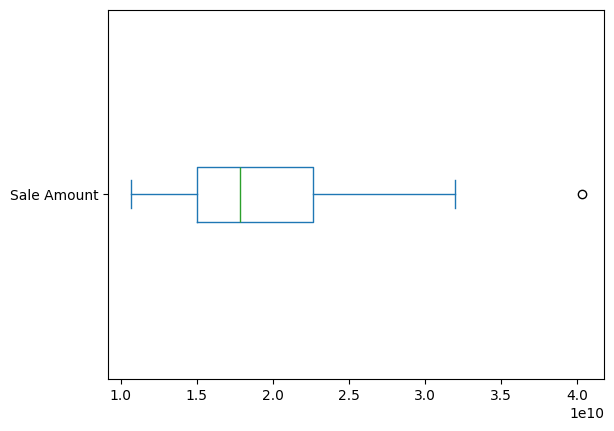

In [24]:
df_by_year["Sale Amount"].plot.box(vert=False)

Based on the box plot above, the median revenue (or total sales amount) for the the real estate market in Connecticut between 2001 and 2020 is about 17 billion dollars. The maximum revenue in this state has been 33 billion dollars and the minimum has been 10 billion dollars. The real estate market in Connecticut has also generated about 40 billion dollars in revenue for some year, but it is also important to know that this is an outlier from the general trend.

# Section 4: Data Analysis

Given an Assessed Value (like 300000 dollars) of a property in Ansonia, Connecticut, how off will the Predicted Sales Amount be to the Actual Sales Amount on average as of 2020? (Essentially predict sale amount of house based on assessed value)

- In order to answer this quesiton, I will be using a linear regression to find the predicted value for the sales amount by utilizing Python's sklearn library that has a method for linear regression. I will then take the absolute value of the error between the true and predicted sales amount to find how off my model is.

In [25]:
from sklearn.linear_model import LinearRegression
df_Ansonia = df[(df["Town"] == "Ansonia") & (df["List Year"] == 2020)]
df_Ansonia


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales-Assessed
0,2020177,2020,4/14/2021,Ansonia,323 BEAVER ST,133000,248400.0,0.5354,Residential,Single Family,115400.0
1,2020225,2020,5/26/2021,Ansonia,152 JACKSON ST,110500,239900.0,0.4606,Residential,Three Family,129400.0
2,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN,174500.0
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400,202500.0,0.6291,Residential,Two Family,75100.0
322,2020108,2020,1/8/2021,Ansonia,145 PULASKI HWY,136100,269000.0,0.5059,Residential,Single Family,132900.0
...,...,...,...,...,...,...,...,...,...,...,...
25622,2020255,2020,6/25/2021,Ansonia,218 MAIN ST,57700,160000.0,0.3606,Vacant Land,NaN,102300.0
25813,2020262,2020,7/1/2021,Ansonia,22 WILLOW ST,157700,350000.0,0.4505,Residential,Four Family,192300.0
25886,2020036,2020,10/28/2020,Ansonia,32 JUDSON PL,145700,265000.0,0.5498,Residential,Three Family,119300.0
25912,2020272,2020,7/8/2021,Ansonia,19 BERKSHIRE CIR,146900,130000.0,1.1300,Residential,Single Family,-16900.0


In [26]:
model = LinearRegression()
ind = ["Assessed Value"]
dep = "Sale Amount"
model.fit(df_Ansonia[ind], df_Ansonia[dep])
df_Ansonia["price_predict"] = model.predict(df_Ansonia[ind])
df_Ansonia["error"] = df_Ansonia["Sale Amount"] - df_Ansonia["price_predict"]
df_Ansonia

C:\Users\venka\AppData\Local\Temp\ipykernel_10660\3989377816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ansonia["price_predict"] = model.predict(df_Ansonia[ind])
C:\Users\venka\AppData\Local\Temp\ipykernel_10660\3989377816.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ansonia["error"] = df_Ansonia["Sale Amount"] - df_Ansonia["price_predict"]


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales-Assessed,price_predict,error
0,2020177,2020,4/14/2021,Ansonia,323 BEAVER ST,133000,248400.0,0.5354,Residential,Single Family,115400.0,254424.429515,-6024.429515
1,2020225,2020,5/26/2021,Ansonia,152 JACKSON ST,110500,239900.0,0.4606,Residential,Three Family,129400.0,243516.677822,-3616.677822
2,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN,174500.0,262908.236387,62091.763613
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400,202500.0,0.6291,Residential,Two Family,75100.0,251709.611316,-49209.611316
322,2020108,2020,1/8/2021,Ansonia,145 PULASKI HWY,136100,269000.0,0.5059,Residential,Single Family,132900.0,255927.275304,13072.724696
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25622,2020255,2020,6/25/2021,Ansonia,218 MAIN ST,57700,160000.0,0.3606,Vacant Land,NaN,102300.0,217919.820515,-57919.820515
25813,2020262,2020,7/1/2021,Ansonia,22 WILLOW ST,157700,350000.0,0.4505,Residential,Four Family,192300.0,266398.716929,83601.283071
25886,2020036,2020,10/28/2020,Ansonia,32 JUDSON PL,145700,265000.0,0.5498,Residential,Three Family,119300.0,260581.249359,4418.750641
25912,2020272,2020,7/8/2021,Ansonia,19 BERKSHIRE CIR,146900,130000.0,1.1300,Residential,Single Family,-16900.0,261162.996116,-131162.996116


In [27]:
df_Ansonia["error_abs"] = df_Ansonia["error"].abs()
df_Ansonia


C:\Users\venka\AppData\Local\Temp\ipykernel_10660\1874144827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ansonia["error_abs"] = df_Ansonia["error"].abs()


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales-Assessed,price_predict,error,error_abs
0,2020177,2020,4/14/2021,Ansonia,323 BEAVER ST,133000,248400.0,0.5354,Residential,Single Family,115400.0,254424.429515,-6024.429515,6024.429515
1,2020225,2020,5/26/2021,Ansonia,152 JACKSON ST,110500,239900.0,0.4606,Residential,Three Family,129400.0,243516.677822,-3616.677822,3616.677822
2,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN,174500.0,262908.236387,62091.763613,62091.763613
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400,202500.0,0.6291,Residential,Two Family,75100.0,251709.611316,-49209.611316,49209.611316
322,2020108,2020,1/8/2021,Ansonia,145 PULASKI HWY,136100,269000.0,0.5059,Residential,Single Family,132900.0,255927.275304,13072.724696,13072.724696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25622,2020255,2020,6/25/2021,Ansonia,218 MAIN ST,57700,160000.0,0.3606,Vacant Land,NaN,102300.0,217919.820515,-57919.820515,57919.820515
25813,2020262,2020,7/1/2021,Ansonia,22 WILLOW ST,157700,350000.0,0.4505,Residential,Four Family,192300.0,266398.716929,83601.283071,83601.283071
25886,2020036,2020,10/28/2020,Ansonia,32 JUDSON PL,145700,265000.0,0.5498,Residential,Three Family,119300.0,260581.249359,4418.750641,4418.750641
25912,2020272,2020,7/8/2021,Ansonia,19 BERKSHIRE CIR,146900,130000.0,1.1300,Residential,Single Family,-16900.0,261162.996116,-131162.996116,131162.996116


In [28]:
df_Ansonia["error_abs"].mean()

61060.11742983159

# Section 5: Overall Summary
To begin, I chose a dataset that explores Real Estate Sales between 2001 and 2020 in the state of Connecticut. It gives the sale amount (revenue) from selling a house, the years that it was listed on the market, and the assessed value of the home. It also gives the location of where these homes are. I found this dataset in the United States Government Open Data website. From my explorations of this dataset, I found that the mean assessed price for all the properties during this time period is about 279143.6653 dollars and the median assessed price of about 138390 dollars. I also found that the range of assessed prices of properties in Connecticut ranged from as low as 0 dollars to high as 881510000 dollars. Furthermore, I also found that the difference between the sales amount and assessed value in Connecticut is about 112007 dollars; the median of this difference is about 84550 dollars. Also, the mean sales amount (or mean revenue) during this time period has been about 391151.1835 dollars, while the median has been about 225000 dollars. The range of revenue (or range of total sales amount) has been between 0 dollars to 5000000000 dollars. It was also very interesting to me that about 14% of the properties in Connecticut have a market value greater than 500000 dollars between 2001 and 2020.

In terms of the entire real estate market in Connecticut between 2001 and 2020 for individual years, the median revenue (or mean total sales amount) is about $17 billion, while some years have even generated about 40 billion dollars, which is an outlier. Not only did I investigate the entire dataset, but I also predicted the sales amount of a property given the assessed value, particularly using 2020 real estate data of a town called Ansonia. Long story short, it turns out that the predictions that I made for this subset of data were off, on average, by about 61,060 dollars. Overall, it seems that the real estate market in Connecticut seems to have had very good years, while also some years in which the market was not very good.

